In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [ ]:
IN_DIR = "E:\\M2\\result\\20221027\\"
OUT_DIR = "E:\\M2\\result\\20221027\\"
sub_dir_list = "cbi_q_10\\1\\"

In [ ]:
columns = ["x", "y", "dx", "dy", "p0", "p1"]

In [ ]:
ptv_result = [pd.DataFrame(index=[], columns=columns)] * 10900

In [ ]:
for tt in range(1, 2):
    for i in tqdm(range(tt, 10900, 10)):
        try:
            r = pd.read_csv(IN_DIR + "ptv\\" + sub_dir_list + f"pp_{i}.csv", delimiter=',')
            if r.empty or np.allclose(r.values, np.zeros([1, 6])):
                r = None

        except StopIteration:
            r = None
        except OSError:
            r = None

        if r is None:
            continue
        else:
            r = pd.DataFrame(data=r.values, columns=columns)

            for row in r.index:
                if (r.loc[row] == 0).all():
                    r.drop(row, axis=0, inplace=True)
            ptv_result[i] = r

In [ ]:
result = np.zeros([10900, 10000, 6])  # x, y, dx, dy, p1, flag
# result[:, :, :-1] = np.nan
p, p_max = 0, 0
ii = 10

In [ ]:
for tt in range(1, 2):
    flag = True

    for t in tqdm(range(tt, 10900, ii)):
        if flag:
            if not ptv_result[t].empty:
                tmp = ptv_result[t].sort_values(by='p0', ascending=True)
                p_max = tmp.values.shape[0]

                result[t, :p_max] = np.hstack([np.hstack([tmp.values[:, :4], tmp.values[:, 5:]]), np.ones([p_max, 1])])
                flag = False

        else:
            tmp = ptv_result[t].sort_values(by='p0', ascending=True)
            p = p_max

            for j in range(tmp.values.shape[0]):
                is_exist = False

                for i in range(p_max):
                    if is_exist:
                        continue

                    if tmp.values[j, 4] == result[t - ii, i, 4]:
                        result[t, i, :4] = tmp.values[j, :4]
                        result[t, i, 4] = tmp.values[j, 5]
                        result[t, i, 5] = 1
                        is_exist = True

                    elif result[t - ii, i, 4] == -1 and \
                        np.sqrt(
                            (result[t - ii, i, 0] + result[t - ii, i, 2] - tmp.values[j, 0]) ** 2 + \
                            (result[t - ii, i, 1] + result[t - ii, i, 3] - tmp.values[j, 1]) ** 2
                        ) < 10:
                        result[t, i, :4] = tmp.values[j, :4]
                        result[t, i, 4] = tmp.values[j, 5]
                        result[t, i, 5] = 1
                        is_exist = True

                if not is_exist:
                    result[t, p, :4] = tmp.values[j, :4]
                    result[t, p, 4] = tmp.values[j, 5]
                    result[t, p, 5] = 1
                    p += 1

            for i in range(p_max):
                if result[t, i, 5] == 0:
                    result[t, i, 0] = result[t - ii, i, 0] + result[t - ii, i, 2]
                    result[t, i, 1] = result[t - ii, i, 1] + result[t - ii, i, 3]
                    result[t, i, 2:4] = result[t - ii, i, 2:4]
                    result[t, i, 4] = -1  # predict

            p_max = p

In [ ]:
result = result[:, :p_max, :]

In [ ]:
for t in range(10900):
    for j in range(p_max):
        if result[t, j, 5] == 0:
            result[t, j, :5] = np.nan

In [ ]:
import matplotlib.cm as cm

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
plt.xlim(0, 1024)
plt.ylim(0, 600)

k = 10

for t in range(1, 10000, 10):
    # ax.scatter(result[t, k, 0], result[t, k, 1])
    # ax.scatter(result[t, k+3, 0], result[t, k+3, 1])
    # ax.scatter(result[t, k+30, 0], result[t, k+30, 1])
    for i in range(10):
        ax.quiver(result[t, k+i*2, 0], 500-result[t, k+i*2, 1], result[t, k+i*2, 3], -result[t, k+i*2, 4], color=cm.tab10(i))

plt.show()

C:\Users\wada\anaconda3\envs\cbi_venv\lib\site-packages\matplotlib\quiver.py:661: RuntimeWarning: Mean of empty slice.
  amean = a[~self.Umask].mean()
C:\Users\wada\anaconda3\envs\cbi_venv\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


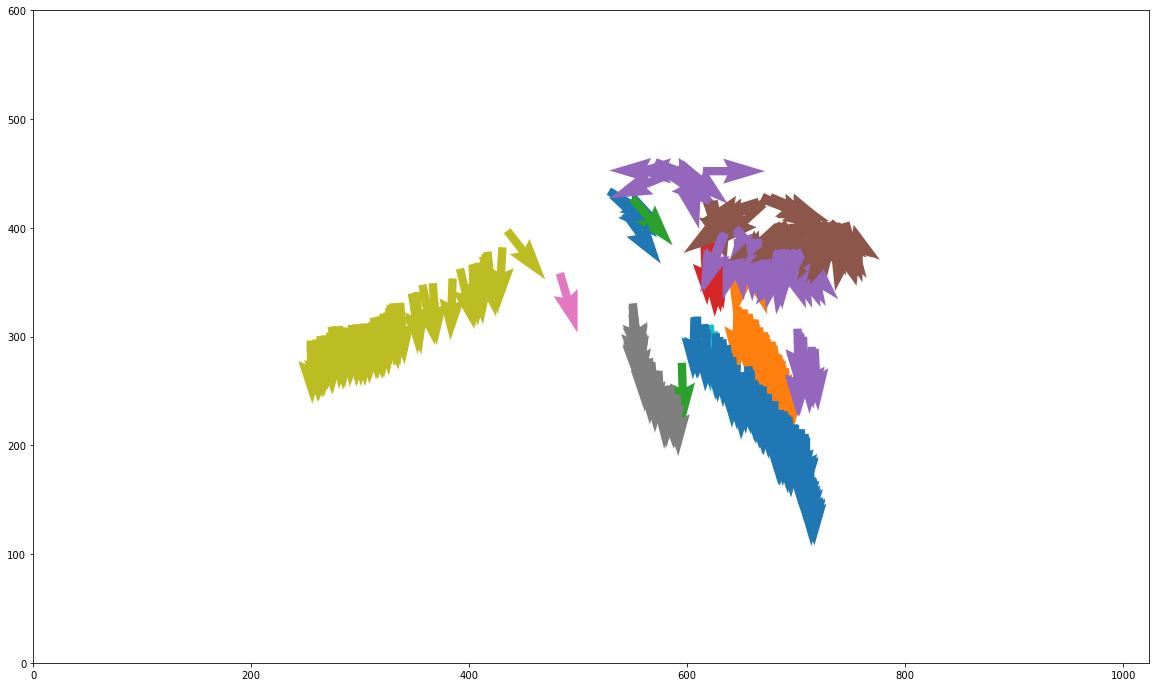

In [40]:
fig, ax = plt.subplots(figsize=(20, 12))
plt.xlim(0, 1024)
plt.ylim(0, 600)

k = 10

for t in range(1, 10000, 10):
    # ax.scatter(result[t, k, 0], result[t, k, 1])
    # ax.scatter(result[t, k+3, 0], result[t, k+3, 1])
    # ax.scatter(result[t, k+30, 0], result[t, k+30, 1])
    for i in range(10):
        ax.quiver(result[t, k+i*2, 0], 500-result[t, k+i*2, 1], result[t, k+i*2, 3], -result[t, k+i*2, 4], color=cm.tab10(i))

plt.show()